<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Защита персональных данных клиентов

Нам нужно защитить данные клиентов страховой компании «Хоть потоп».  
Задача - разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. 

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.  
Подбирать наилучшую модель не требуется.

Исследование будет содержать следующие этапы:
- Загрузка и подготовка данных;
- Умножение матриц;
- Алгоритм преобразования;
- Проверка алгоритма;
- Общий вывод.

## Загрузка и подготовка данных

In [21]:
import warnings

import pandas as pd

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

<div class="alert alert-info"> <b>Комментарии студента:</b> 
Я не смог понять что именно некорректно в импортах. прогнал блок с импортами через https://www.pythonchecker.com/ и не получил никаких замечаний.
    
Речь о том, что `warnings` входит в стандартную библиотеку и должне быть выше, чем все библиотеки (sklearn, matplotlib, pandas, numpy), которые считаются сторонними библиотекками?
</div>

In [22]:
warnings.filterwarnings("ignore")

In [23]:
try:
    df = pd.read_csv('/datasets/insurance.csv')
except:
    df = pd.read_csv('datasets/insurance.csv')

In [24]:
display(df.head())

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Пропуски в данных отсутствуют, формат признаков `Возраст` и `Зарплата` имеют тип `float64`

In [26]:
# Посмотрим на описание данных
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [27]:
# Скорректируем типы данных, а также оптимизируем их
df['Пол'] = pd.to_numeric(df['Пол'], downcast='integer')
df['Возраст'] = pd.to_numeric(df['Возраст'], downcast='integer')
df['Зарплата'] = df['Зарплата'].astype('int')
df['Зарплата'] = pd.to_numeric(df['Зарплата'], downcast='integer')
df['Члены семьи'] = pd.to_numeric(df['Члены семьи'], downcast='integer')
df['Страховые выплаты'] = pd.to_numeric(df['Страховые выплаты'], downcast='integer')

In [28]:
display(df.dtypes)

Пол                   int8
Возраст               int8
Зарплата             int32
Члены семьи           int8
Страховые выплаты     int8
dtype: object

In [29]:
# посмотрим на количество полных дубликатов
print("Полных дубликатов:", df.duplicated().sum())

Полных дубликатов: 153


В данных отсутствует идентификатор, однозначно утверждать наличие полных дубликатов затруднительно.

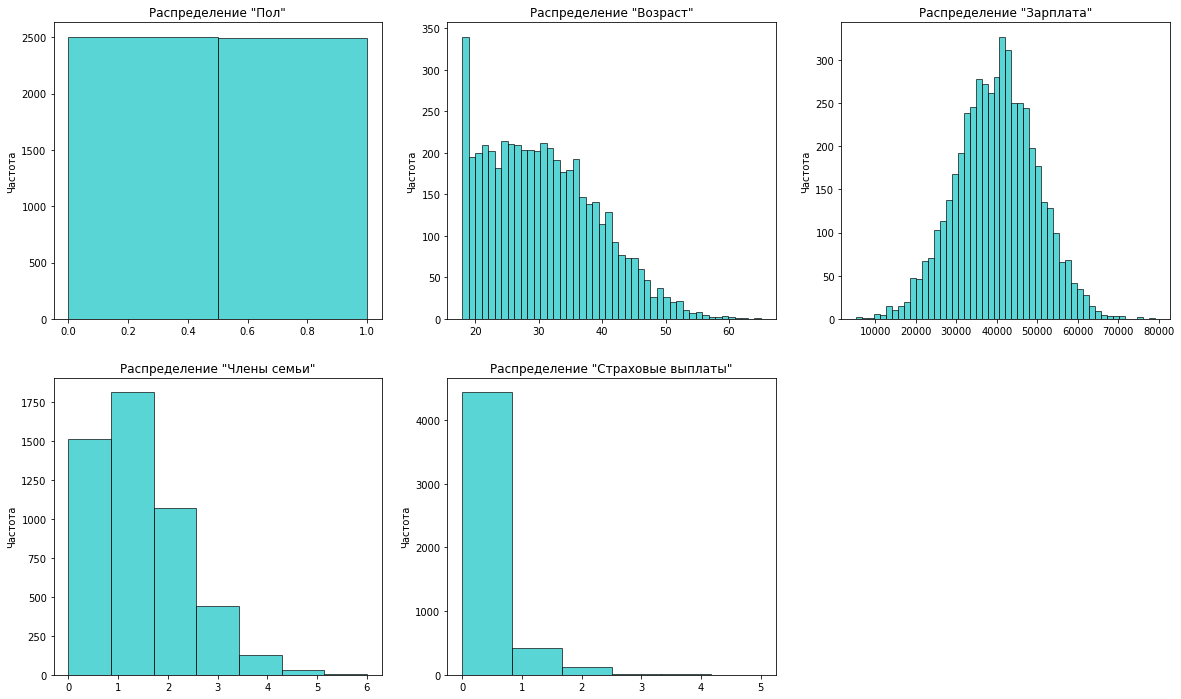

In [30]:
plt.figure(figsize=(20, 12))

for i, col in enumerate(df.columns):
    nbins = 50
    plt.subplot(2, 3, i+1)
    if len(df[col].unique()) < 50:
        nbins = len(df[col].unique())
    plt.hist(df[col], bins=nbins, color='c', edgecolor='k', alpha=0.65)
    plt.title(f'Распределение "{col}"')
    plt.ylabel('Частота')
    
plt.show()

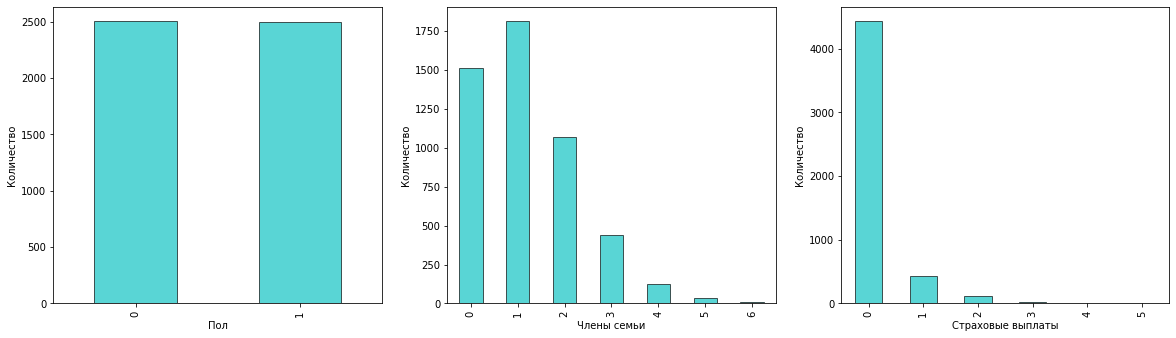

In [34]:
plt.figure(figsize=(20, 12))

for i, col in enumerate(['Пол', 'Члены семьи', 'Страховые выплаты']):
    plt.subplot(2, 3, i+1)
    df.groupby([col])[col].count().plot(kind='bar', color='c', edgecolor='k', alpha=0.65)
    #plt.title(f'Распределение "{col}"')
    plt.ylabel('Количество')
    
plt.show()

In [37]:
pd.crosstab(df["Члены семьи"], df["Страховые выплаты"], normalize=True)

Страховые выплаты,0,1,2,3,4,5
Члены семьи,,,,,,
0,0.2666,0.0264,0.0076,0.0012,0.0008,0.0000
1,0.3188,0.0324,0.0098,0.0014,0.0002,0.0002
2,0.1926,0.0162,0.0040,0.0010,0.0004,0.0000
3,0.0792,0.0076,0.0010,0.0000,0.0000,0.0000
4,0.0230,0.0014,0.0004,0.0000,0.0000,0.0000
5,0.0058,0.0004,0.0002,0.0000,0.0000,0.0000
6,0.0012,0.0002,0.0000,0.0000,0.0000,0.0000


Аномалии не обнаружены.

**Выводы**:
- пропуски отсутствуют;
- аномалии в данных не обнаружены.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Обоснование строится на следующих свойствах:
- Умножение матрицы на единичную матрицу — исходная матрица $ AE = EA = A $
- Произведение единичных матриц — единичная матрица $ EE = E $
- Умножение матрицы на обратную матрицу даёт единичную матрицу $ AA^{-1} = A^{-1} A = E $
- $ (AB)^T = B^T A^T $
- $ (AB)^{-1} = B^{-1} A^{-1} $

Выразим предсказания через формулу обучения:
$$ a = Xw = X (X^T X)^{-1} X^T y $$

Докажем, что умножение на обратимую матрицу $ M $ даёт равенство:
$$ a = (X M)w = (X M)((X M)^T X M)^{-1} (X M)^T y = (X M)(M^T X^T X M)^{-1} (XM)^T y = X M M^{-1} (X^T X)^{-1} (M^T)^{-1} M^T X^T y = X (X^T X)^{-1} X^T y $$

**Вывод:** умножение признаков на обратимую матрицу не должно изменить качество линейной регрессии. 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Теоетическое обоснование и матричные преобразования корректны, молодец!

## Алгоритм преобразования

**Алгоритм**

1. Делим выборку на обучающие признаки и целевой признак, т.е отделяем от данных количество страховых выплат;
2. Создаем случайную матрицу размером 4х4 (в выборке 4 признака);
3. Умножаем случайную матрицу на константу 11363;
4. Матрицу признаков умножаем на созданную матрицу;
5. Обучаем модель на новых признаках;
6. Получаем предсказания;
7. В качестве метрики берем коэффициент детерминации R2;
8. Обучаем модель на исходных данных и получаем предсказания на исходных данных;
9. Сравниваем два коэффициента детерминации и определяем работоспособность алгоритма

**Обоснование**

Согласно доказательству выше, при умножении признаков на обратимую матрицу будут получаться обратные матрицы, произведение которых с исходной матрицей будет давать единичные матрицы. Таким образом это не изменит качество линейной регрессии.

## Проверка алгоритма

In [11]:
X = df.drop('Страховые выплаты', axis=1)
y = df['Страховые выплаты']

In [12]:
# создаём класс линейной регрессии

class LinReg:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv((X.T @ X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]
        print(f'Рассчитанные веса: {w}')
        
    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [13]:
# веса и R2_score созданной модели
np.set_printoptions(suppress=True)

model = LinReg()
model.fit(X, y)
predictions = model.predict(X)
print(f'r2_score модели линейной регресии до преобразования признаков: {r2_score(y, predictions):.4f}')

Рассчитанные веса: [-0.93823545  0.00792581  0.03570831 -0.00000017 -0.01356766]
r2_score модели линейной регресии до преобразования признаков: 0.4249


In [14]:
# создадим случайную квадратную матрицу, размером по количеству признаков
np.random.seed(11363)

magic_matrix = np.random.rand(X.shape[1], X.shape[1])
magic_matrix

array([[0.84233299, 0.64488826, 0.2686537 , 0.69250255],
       [0.85059244, 0.97034925, 0.00820826, 0.83234683],
       [0.9354773 , 0.78566182, 0.06051125, 0.56872645],
       [0.82384108, 0.9078047 , 0.13240713, 0.4405684 ]])

In [15]:
# проверим на обратимость
np.linalg.inv(magic_matrix)

array([[-0.21348939, -2.08863808,  4.45972958, -1.47548704],
       [-0.89395935,  1.0987712 , -2.89779821,  3.07004524],
       [ 3.37455027, -1.4218611 , -4.09127141,  2.663403  ],
       [ 1.22706787,  2.06891995, -1.13889268, -2.0974909 ]])

In [16]:
# умножим случайную матрицу на обратную, должна получиться единичная матрица
magic_matrix @ np.linalg.inv(magic_matrix)

array([[ 1., -0.,  0., -0.],
       [ 0.,  1.,  0., -0.],
       [ 0., -0.,  1.,  0.],
       [ 0., -0.,  0.,  1.]])

In [17]:
# умножим признаки на случайную матрицу
X_encoded = X.dot(magic_matrix)
X_encoded.head()

,0,1,2,3
0,46436.214331,39010.163434,3002.095597,28244.091365
1,35588.088330,29900.693145,2299.937486,21650.333740
2,19669.690391,16527.038412,1270.974289,11967.393573
3,39028.913354,32784.290963,2523.756311,23734.253515
4,24440.616339,20533.588248,1579.842109,14867.758640


In [18]:
# обучим модель на новых признаках, найдем предсказания, веса и посчитаем R2:

model = LinReg()
model.fit(X, y)
predictions = model.predict(X)
print(f'r2_score модели линейной регресии до преобразования признаков: {r2_score(y, predictions):.4f}\n')

model = LinReg()
model.fit(X_encoded, y)
predictions_encoded = model.predict(X_encoded)
print(f'r2_score модели линейной регресии после преобразования признаков: {r2_score(y, predictions):.4f}\n')

model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
print(f'r2_score модели линейной регресии (sklearn) до преобразования признаков: {r2_score(y, predictions):.4f}\n')

model = LinearRegression()
model.fit(X_encoded, y)
predictions_encoded = model.predict(X_encoded)
print(f'r2_score модели линейной регресии (sklearn) после преобразования признаков: {r2_score(y, predictions):.4f}')

Рассчитанные веса: [-0.93823545  0.00792581  0.03570831 -0.00000017 -0.01356766]
r2_score модели линейной регресии до преобразования признаков: 0.4249

Рассчитанные веса: [-0.93823533 -0.05625565 -0.00950279 -0.060162    0.1120612 ]
r2_score модели линейной регресии после преобразования признаков: 0.4249

r2_score модели линейной регресии (sklearn) до преобразования признаков: 0.4249

r2_score модели линейной регресии (sklearn) после преобразования признаков: 0.4249


**Вывод**: качество модели, обученной на обычных/закодированных признаках идентично.

In [19]:
# не смог найти этого требования в задании (по этой причине не делал сразу)
# тем не менее, сделал:

X_decoded = round(abs(X_encoded.dot(np.linalg.inv(magic_matrix))))
for col in X_decoded.iloc[:,:]:
    X_decoded[col] = X_decoded[col].astype(int)
X_decoded.columns = X.columns

display(X_decoded.head())
display(X.head())

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


## Общий вывод

В ходе работы было выполнено:

- Загружены, изучены и подготовлены данные;
- Математически проверена гипотеза о неизменности качества линейной регрессии в результате умножения признаков на обратимую матрицу;
- Предложен и обоснован алгоритм преобразования данных для шифрования персональной информации клиентов компании;
- В результате проверки алгоритма отличий в качестве линейной регрессии до и после преобразования не выявлено.